# Módulo: Regresión y Correlación
## T11b: Medidas de correlación

# Objetivos de la clase
- Conocer los fundamentos del análisis bivariado y su aplicación
- Aprender técnicas de estimación de variación conjunta y correlación entre variables
- Distinguir entre los conceptos de correlación y causalidad

# Análisis bivariado

## Concepto de análisis bivariado

El análisis bivariado estudia las relaciones empíricas entre dos variables estadísticas

<center>
    <img src="figures/stats-1.jpg" width="600"/>
</center>

La idea es descubrir asociaciones entre las variables y su grado de asociación


## Covarianza

Así como la varianza indica el grado de variabilidad de una variable estadística, la covarianza indica el grado de **variabilidad conjunta** de dos variables estadísticas.

<center>
    <img src="figures/cov-1.png" width="500"/>
</center>

Si valores grandes (pequeños) de una variable se corresponden con valores grandes (pequeños) de la otra variable, entonces la covarianza es positiva.

En caso contrario la covarianza resulta ser negativa. Es decir, valores pequeños se corresponden con valores grandes y viceversa.

Matemáticamente la covarianza muestral entre dos variables $X$ e $Y$ se estima de la siguiente forma:

\begin{align}
    \text{Cov}(X, Y) = \sum_{i=1}^{n} \frac{ (x_{i} - \bar{x}) (y_{i} - \bar{y}) }{n-1}
\end{align}

Notar que la variaza muestral es un caso particular de la covarianza muestral cuando las dos variables son idénticas

# Medidas de Correlación

## Coeficiente de correlación (Pearson)
La normalización de la covarianza muestral resulta en el coeficiente de correlación de Pearson, que es una medida normalizada de la correlación lineal entre dos variables.

Matemáticamente el coeficiente de correlación (Pearson) se calcula de la siguiente forma para una muestra:

\begin{align}
    r_{xy} = \frac{1}{n-1} \sum_{i=1}^{n} \frac{ (x_{i} - \bar{x}) (y_{i} - \bar{y}) }{S_{x} S_{y} }
\end{align}



El valor de $r$ puede variar entre -1 y 1.

Un $r$ mayor a cero indica una correlación lineal positiva, mientras que un $r$ menor a cero indica una correlación lineal negativa.

Un $r$ cercano a cero indica que no hay correlación lineal.
<center>
    <img src="figures/corr-coef-2.png" width="900"/>
</center>

**Ejemplo**
En una minera se quiere estudiar la relación entre la densidad del mineral y la potencia del molino SAG para alcanzar una molienda óptima.

<br>
<center>
<table><tr>
<td> <img src="figures/sag-1.jfif" width="600"/> </td>
<td> <img src="figures/sag-gif-1.gif" width="500"/> </td>
</tr></table>
</center>

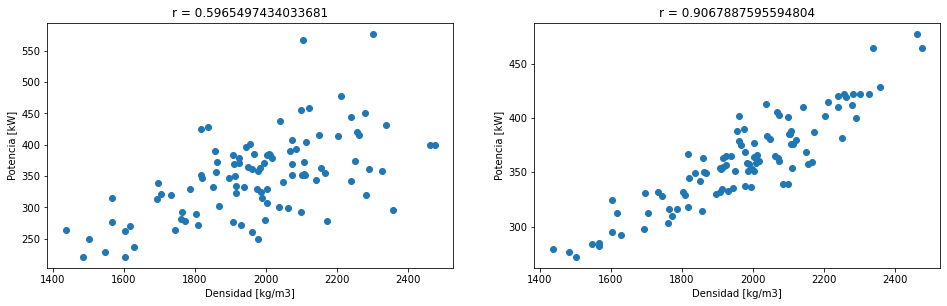

In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)
density = 2100*(1+(np.random.randn(100)-0.5)/10)
power1 = (1+(np.random.randn(100)-0.5)/8)*density*130/700
power2 = (1+(np.random.randn(100)-0.1)/20)*density*130/700

fig, ax = plt.subplots(ncols=2)
fig.set_size_inches(16, 4.5)
ax[0].scatter(density, power1), ax[1].scatter(density, power2)
ax[0].set_xlabel('Densidad [kg/m3]'), ax[0].set_ylabel('Potencia [kW]'), ax[0].set_title('r = ' + str(np.corrcoef(density, power1)[0][1]))
ax[1].set_xlabel('Densidad [kg/m3]'), ax[1].set_ylabel('Potencia [kW]'), ax[1].set_title('r = ' + str(np.corrcoef(density, power2)[0][1]))
plt.show()

## Diferencias con coeficiente de determinación

El **coeficiente de correlación $r$** es una medida de la asociación lineal entre dos variables.

El **coeficiente de determinación** $R^{2}$ es una medida de qué tan bien un modelo de regresión lineal puede ajustar a dos variables.

Obviamente dos variables que tengan una alta linealidad entre ellas, tendrán más chances de poder modelarse correctamente mediante una regresión lineal.


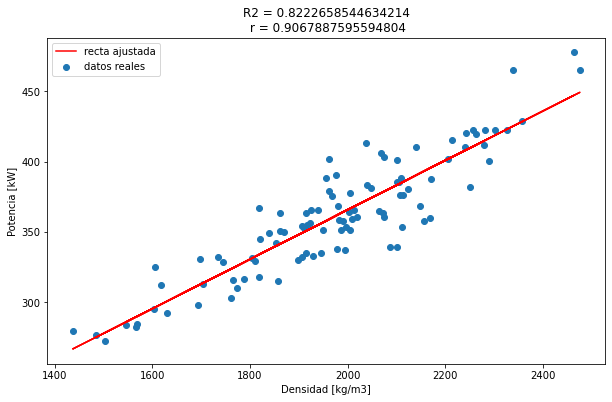

In [36]:
from sklearn.metrics import r2_score
power = power2

b1, b0 = np.polyfit(density, power, 1) #regresion lineal
power_pred = b0 + b1*density #calculo de variable dependiente con modelo de regresion

plt.figure(figsize=(10,6))
plt.scatter(density, power, label='datos reales')
plt.plot(density, power_pred, label='recta ajustada', color='red')
plt.xlabel('Densidad [kg/m3]'), plt.ylabel('Potencia [kW]')
plt.title('R2 = ' + str(r2_score(power, power_pred) ) + '\n r = ' + str(np.corrcoef(density, power)[0][1])), plt.legend()
plt.show()

## Coeficiente de correlación (Spearman)

Se trata de un coeficiente de correlación de rango entre dos variables aleatorias.

Básicamente mide qué tan bien la relación entre dos variables puede describirse mediante una función monotónica.

<center>
    <img src="figures/spearman-1.png" width="400"/>
</center>

## Correlación y causalidad

Es importante notar que una correlación es cualquier relación estadística causal o no entre dos variables aleatorias.

Esto significa que a pesar que tengan una alta correlación, no significa que uno de los fenómenos sea la **causa** del otro.

<center>
    <img src="figures/corr-caus-1.png" width="600"/>
</center>

La correlación es una condición necesaria, pero no suficiente para establecer causalidad.


# Sumario

- El análisis bivariado estudia las relaciones estadísticas entre dos variables.
- El coeficiente de correlación (Pearson) cuantifica el grado de relación lineal entre dos variables.
- Que dos variables tengan una alta correlación no implica necesariamente que tengan una relación causa-efecto.